<a href="https://colab.research.google.com/github/leixiaohui-1974/CHS/blob/feat%2Fwater-system-simulator/%E5%9F%BA%E4%BA%8ECHS%E5%BA%93%E7%9A%84%E5%8D%95%E5%AE%B9%E6%B0%B4%E7%AE%B1PID%E6%8E%A7%E5%88%B6%E4%BB%A3%E7%A0%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

仿真完成。
最终水位 (storage): 1.11


/tmp/ipython-input-3144825182.py:93: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-3144825182.py:93: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-3144825182.py:93: UserWarning: Glyph 31186 (\N{CJK UNIFIED IDEOGRAPH-79D2}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-3144825182.py:93: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-3144825182.py:93: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-3144825182.py:93: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from font(s)

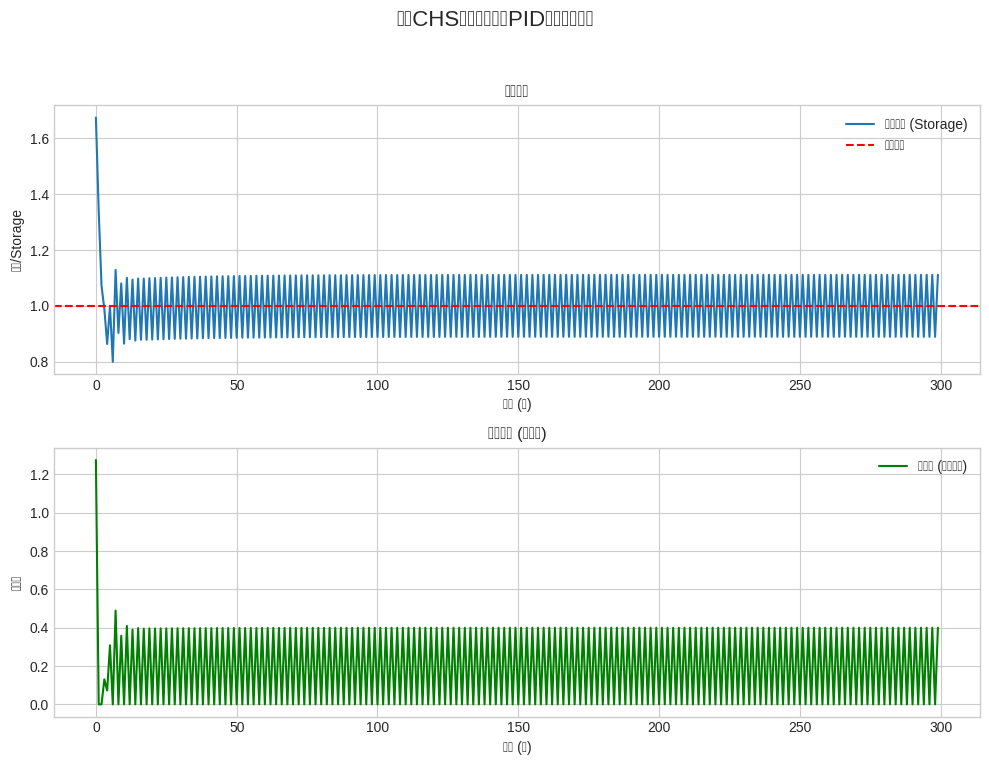

In [5]:
# -*- coding: utf-8 -*-
"""
基于 CHS water_system_simulator 库的单容水箱PID控制仿真。

该脚本演示了如何使用 CHS 库中的组件来搭建一个 PID 控制系统，
以控制一个单容水箱的水位。
"""
import matplotlib.pyplot as plt

# 导入 CHS 库中的相关类
from CHS.water_system_simulator.modeling.storage_models import FirstOrderInertiaModel
from CHS.water_system_simulator.control.pid_controller import PIDController

# -----------------------------------------------------------------------------
# 仿真主程序
# -----------------------------------------------------------------------------
def run_simulation_chs():
    """
    运行基于 CHS 库的单容水箱PID控制仿真。
    """
    # 仿真参数
    simulation_time = 300  # 总仿真时间 (秒)
    dt = 1.0               # 时间步长 (秒)
    n_steps = int(simulation_time / dt)

    # 系统初始化
    # 使用 CHS 库中的 FirstOrderInertiaModel 作为单容水箱模型
    # time_constant 参数可以理解为水箱的流出阻力，值越大，水箱响应越慢
    tank = FirstOrderInertiaModel(initial_storage=0.5, time_constant=5.0)

    # 设定目标水位
    # CHS 库的 FirstOrderInertiaModel 使用 'storage' 而非 'level'，
    # 在这个简单的模型中，我们可以假设它们是等价的，或者有一个线性关系
    setpoint = 1.0  # 目标 'storage' 值 (例如，米)

    # PID参数
    # 您可以调整这些参数来观察不同的控制效果
    kp = 1.5
    ki = 0.05
    kd = 1.0

    # 使用 CHS 库中的 PIDController
    pid_controller = PIDController(kp=kp, ki=ki, kd=kd, setpoint=setpoint)

    # 数据记录
    time_points = []
    levels = []
    inflows = []

    # 仿真主循环
    for i in range(n_steps):
        current_time = i * dt

        # PID控制器根据当前水箱的 'storage' 值计算控制输出
        inflow_command = pid_controller.calculate(tank.storage, dt)

        # 限制流入量为正值，模拟阀门控制
        inflow = max(0, inflow_command)

        # 更新水箱状态
        # FirstOrderInertiaModel.step() 方法需要一个净流入量
        # 我们假设流出量是根据 time_constant 自动计算的，因此这里的 inflow 就是净流入量
        tank.step(inflow)

        # 记录数据
        time_points.append(current_time)
        levels.append(tank.storage) # 记录 water_system_simulator 库中的 'storage' 值
        inflows.append(inflow)

    print("仿真完成。")
    print(f"最终水位 (storage): {levels[-1]:.2f}")

    # 绘制结果
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle('基于CHS库的单容水箱PID控制仿真结果', fontsize=16)

    # 绘制水位曲线
    ax1.plot(time_points, levels, label='水箱水位 (Storage)')
    ax1.axhline(y=setpoint, color='r', linestyle='--', label='目标水位')
    ax1.set_title('水箱水位')
    ax1.set_xlabel('时间 (秒)')
    ax1.set_ylabel('水位/Storage')
    ax1.legend()

    # 绘制流入量曲线
    ax2.plot(time_points, inflows, label='流入量 (控制输出)', color='g')
    ax2.set_title('控制输出 (流入量)')
    ax2.set_xlabel('时间 (秒)')
    ax2.set_ylabel('流入量')
    ax2.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 脚本入口
if __name__ == "__main__":
    run_simulation_chs()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')